# Intro to Linear Regression with Scikit


- We will run a multiple linear regression with simple data cleanup steps. (Statistical tests/ methods or chart analysis will not be inlcuded (for simplicity). 
- The objective of this notebook is to introduce how to run a linear regression with ScikitLearn package. 

### Target: 
Predict prices of automobiles based on selected numercial variables -->  Target variable

#### Linear Regression
- Assumes linearity
- 4 Hypothesis
    - centered (errors must be centered, expectation zero)
    - homoscedastic (constant variance)
    - independent
    - gaussian 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.feature_selection import SelectFromModel


df= pd.read_csv('automobiles.csv')
display(df)
display(df.info())
# missing values
print('Missing values sum: ', df.isnull().sum().sum())
#duplicates check
print('Duplicates sum: ', df.duplicated().sum())
df.columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

None

Missing values sum:  0
Duplicates sum:  0


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

##### Observations for cleanup and preprocessing

- '?' values found under normalized_losses --> analyse, how many are these? percentage?  --> for simplicity we will drop these
- '?' values found under target variable price --> DELETE
- '?' also for bore and stroke --> delete rows for simplicity

In [2]:
# target variable is price, find price =='?'
df[df['price'] == '?']

# drop rows with price == '?'
df = df[df['price'] != '?']
# convert price to numeric
df['price'] = pd.to_numeric(df['price'])

In [3]:
# filter on normalized_losses=='?'
#df[df['normalized-losses'] == '?']
# drop rows with normalized-losses == '?'
df = df[df['normalized-losses'] != '?']
# convert normalized-losses to numeric
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
# check for missing values


# filter on bore=='?'
#df[df['bore'] == '?']
# drop rows with bore == '?'
df = df[df['bore'] != '?']
# convert bore to numeric
df['bore'] = pd.to_numeric(df['bore'])
# check for missing values


# filter on stroke=='?'
#df[df['stroke'] == '?']
# drop rows with stroke == '?'
df = df[df['stroke'] != '?']
# convert stroke to numeric
df['stroke'] = pd.to_numeric(df['stroke'])
# check for missing values
print('Missing values sum: ', df.isnull().sum().sum())

Missing values sum:  0


In [4]:
# for simplicity we keep only selected numerical type columns
df= df[['symboling', 'normalized-losses',  'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 3 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   wheel-base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb-weight        160 non-null    int64  
 7   engine-size        160 non-null    int64  
 8   bore               160 non-null    float64
 9   stroke             160 non-null    float64
 10  compression-ratio  160 non-null    float64
 11  horsepower         160 non-null    object 
 12  peak-rpm           160 non-null    object 
 13  city-mpg           160 non-null    int64  
 14  highway-mpg        160 non-null    int64  
 15  price              160 non-null    int64  
dtypes: float64(7), int64(7), object

- The symboling variable indicates the degree of risk in relation to the insurer, taking into account factors like the risk of accidents and breakdowns.

- The normalized_losses variable represents the relative average annual cost of vehicle insurance. It's normalized based on cars of the same type (SUV, utility, sports, etc.).

- The next 13 variables refer to technical specifications of the cars, including dimensions, engine displacement, horsepower, etc.

- The final variable, price, denotes the selling price of the vehicle. This is the variable we aim to predict.

In [5]:
#some columns are of type object although they are numeric
#convert all to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 3 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   wheel-base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb-weight        160 non-null    int64  
 7   engine-size        160 non-null    int64  
 8   bore               160 non-null    float64
 9   stroke             160 non-null    float64
 10  compression-ratio  160 non-null    float64
 11  horsepower         160 non-null    int64  
 12  peak-rpm           160 non-null    int64  
 13  city-mpg           160 non-null    int64  
 14  highway-mpg        160 non-null    int64  
 15  price              160 non-null    int64  
dtypes: float64(7), int64(9)
memory 

In [6]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
# split target variable
X = df.drop(columns=['price'])
y = df['price']

#train test split - set aside test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#standardize
scaler=preprocessing.StandardScaler()

X_train[X_train.columns]=pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_test[X_test.columns]=pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index)

In [9]:
#linear regression
# fit: trains the model on the dataset given as input
# predict: predicts the target variable from the set of explanatory variables given as input

#instantiate the model
lr= LinearRegression()
# fit the model
lr.fit(X_train, y_train)
# predict the target variable on train set
y_pred_train= lr.predict(X_train)
# predict the target variable on test set
y_pred_test= lr.predict(X_test)

#### Evaluating performance
##### Metrics


<u > Coefficient of Determination</u >
- The metrics to evaluate performance will be R^2 (coefficient of determination) and the RMSE
- R^2: indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s) in a regression model. (how well does the model fit the observed data?)
- R^2=0 the model explains none of the variability, no predictive power offered by the independent variables. 
- The closer R^2 is to 1, the better the model fits the data

<u>MSE </u>
- common metric used for evluating performance --> average of squared differentes between predicted values and actual target values

<u> RMSE </u>
- The lower the RMSE is, the better the predictions
- We will compare the performance onf both set train and test. --> How well does the model perform on seen data vs. unseen data?

##### MSE

In [10]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Train MSE: ', round(mse_train, 0))
print('Test MSE: ', round(mse_test, 0))

Train MSE:  4910345.0
Test MSE:  7131604.0


- large difference range within the pred scores
- due to the high number, interpretation is difficult
- instead , we use MAE --> this metric is on the same scale as the target variable making it better to interpret

##### MAE

In [11]:
mae_train= mean_absolute_error(y_train, y_pred_train)
mae_test= mean_absolute_error(y_test, y_pred_test)
print('Train MAE: ', round(mae_train, 0))
print('Test MAE: ', round(mae_test, 0))

Train MAE:  1599.0
Test MAE:  2032.0


- much better for interpretation!
- difference around than 300 , lhigher in the test set which could mean underfitting?!?!

- We will now calculate the relative error to  by first getting the average prices for all vehicles from the dataset


In [13]:
mean_price= df['price'].mean()
print('Mean price: ', round(mean_price, 0))
print('Relative errorr test set: ', round(mae_test/mean_price*100, 0), '%')
print('The MAE is 18% of the average price, which is not optimal. It is still a good baseline for improving the model or testing more advanced models.') 


Mean price:  11428.0
Relative errorr test set:  18.0 %
The MAE is 18% of the average price, which is not optimal. It is still a good baseline for improving the model or testing more advanced models.


##### RMSE

In [94]:
#help(cross_val_score)

In [14]:
#R^2 scores
print('Train R^2: ', round(lr.score(X_train, y_train),3))
print('R^2 with cross-validation (mean): ', round(cross_val_score(lr, X_train, y_train).mean(),3))
      
print('Test R^2: ', round(lr.score(X_test, y_test),3))

cross_val_score(lr, X_train, y_train).round(3)


Train R^2:  0.867
R^2 with cross-validation (mean):  0.766
Test R^2:  0.696


array([0.737, 0.775, 0.766, 0.753, 0.797])

- Crossvalidation gives a much lower average estimate than the training set score
- Train R^2 is too optimistic
- Test R^2 gives a lower score than train set --> this suggests overfitting
- In general test scores are a lower than train scores because the model learns with training data and thus can predict well on the training data. It has never seen the test data so the predictions are not as good. However, the difference should not be too significant because the model must be able to generalize to other data. Here the model learns the training data too perfectly and does not generalise well to new test data. 

 - Tighter line on train set observable, specifically  lower-priced area.
- In test set points further away from the line, specifically towards higher prices can be observed.
- Outliers can have a major influence on linear regression models. --> The essence of this model is to minimizw squared residuals between predicted and true values.
- Larg residuals have a disproportionate influence on the model, the straigt line helps us detect these influencers.  --> not observed in our graphs. 


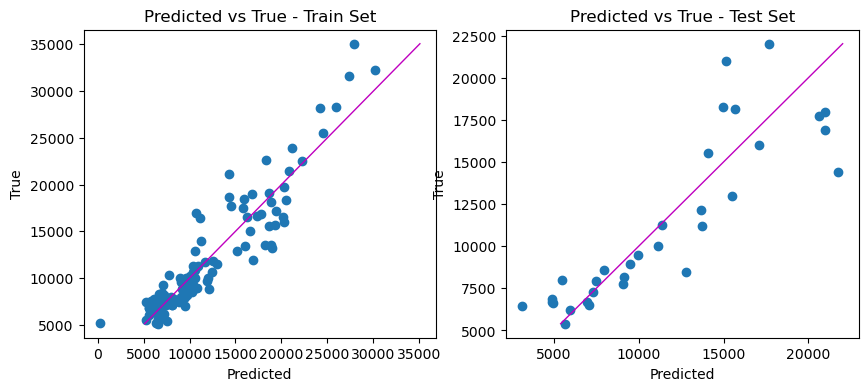

In [15]:
print(' - Tighter line on train set observable, specifically  lower-priced area.')
print('- In test set points further away from the line, specifically towards higher prices can be observed.')
print('- Outliers can have a major influence on linear regression models. --> The essence of this model is to minimizw squared residuals between predicted and true values.')
print('- Larg residuals have a disproportionate influence on the model, the straigt line helps us detect these influencers.  --> not observed in our graphs. ')
#subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#plot train set
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, y_train)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs True - Train Set')
plt.plot((y_train.min(),y_train.max()), (y_train.min(),y_train.max()), color='m', lw=1)
#plot test set
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, y_test)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs True - Test Set')
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()), color='m', lw=1)
plt.show();

#### Reviewing assumption of centering (residuals var 0) and homoscedascity (normal distr)
- We graph the residuals as a funciton of the target variable
- Residuals should be scattered around y=0, randomly
- for this we must calculate the residuals

 - The points are distribution rel. uniformly around the y=0 line bacuse the avg of the residuals is close to 0.
- We see a structure in the residuals distribution, towards the lower prices the residuals are more concentrated, while towards the higher prices the residuals are more dispersed. 
- Towards the higher prices the residuals are more dispersed (less centered), which means that the model is less accurate in this area, tending to negative. 


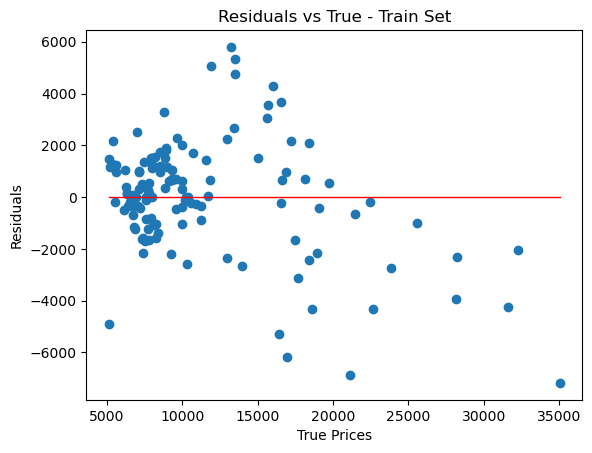

In [16]:
print(' - The points are distribution rel. uniformly around the y=0 line bacuse the avg of the residuals is close to 0.')
print('- We see a structure in the residuals distribution, towards the lower prices the residuals are more concentrated, while towards the higher prices the residuals are more dispersed. ')
print('- Towards the higher prices the residuals are more dispersed (less centered), which means that the model is less accurate in this area, tending to negative. ')
# we have y_pred_train
residus=y_pred_train - y_train

plt.scatter(y_train, residus);
plt.plot((y_train.min(),y_train.max()), (0,0), color='r', lw=1)
plt.xlabel('True Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs True - Train Set')
plt.show();

#### QQ Plot to asses normality of the residuals
- using stats.probplot function

 The points align approximately along the line, assumption of normality is plausible. 
 The points are not perfectly aligned along the line, but they are close enough to suggest that the residuals are approximately normally distributed. 
Our multiple regression model seems adapted to our data, however, it can be improved. 


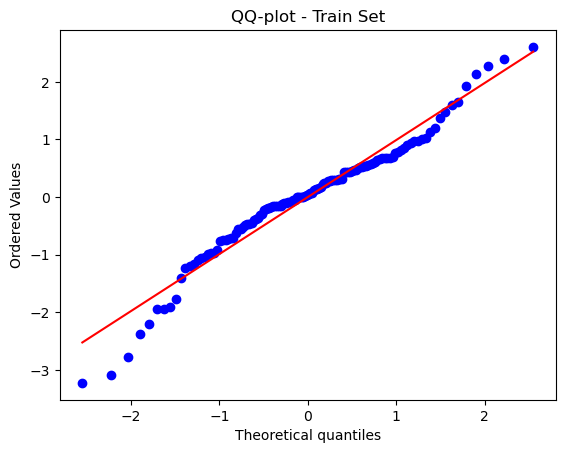

In [17]:
import scipy.stats as stats
print(' The points align approximately along the line, assumption of normality is plausible. ')
print(' The points are not perfectly aligned along the line, but they are close enough to suggest that the residuals are approximately normally distributed. ')
print('Our multiple regression model seems adapted to our data, however, it can be improved. ')
residus_norm=(residus - residus.mean())/residus.std()
#QQ-plot
stats.probplot(residus_norm, dist="norm", plot=plt)
plt.title('QQ-plot - Train Set')
plt.show();

### Improve performance
- Instead of delete the '?' values we could replace them by the mean/median in case of numerical values or by the mode in case of categorical (using the SimpleImputer)
- We do not remove the categorical values, instead we could perform some test statistics in order to decide which features we can to keep. --> Pearsons, Spearmns, Chi2Tes --> calculate P-values
- Choice of encoding categorical variables to be review (One-hot encoding?, Ordinal Encoding?)
- Review correlations for numerical variables --> do we have variables that correlate among themselves --> keep one, the rest maybe produces noice
- Remove variables that have little relationship with variable to be explained.
- Outliers --> decide how we will deal with those --> remove them? create categories of ranges?
- Create new features out of the available ones? 
....

There are various approaches that can be taken, both on the data processing side (feature selection, engineering, reduction and on the modelling side (choose other, more advanced models)


### Feature Selection

#### Numerical Variables - Correlation heatmap
- We will review the correlations of the quantitative features


In [18]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518388,-0.520465,-0.336217,-0.219850,-0.473994,-0.252372,-0.110238,-0.257013,-0.020539,-0.139022,-0.003669,0.199798,0.088912,0.149309,-0.163329
normalized-losses,0.518388,1.000000,-0.064001,0.029114,0.104857,-0.417081,0.122860,0.203841,-0.036167,0.065627,-0.129971,0.290906,0.240676,-0.236934,-0.189691,0.199924
wheel-base,-0.520465,-0.064001,1.000000,0.871968,0.815935,0.558764,0.810507,0.650488,0.580484,0.164012,0.293968,0.514507,-0.292491,-0.576635,-0.608270,0.734789
length,-0.336217,0.029114,0.871968,1.000000,0.839184,0.505156,0.870355,0.726666,0.649059,0.116049,0.188968,0.666726,-0.239104,-0.716877,-0.717831,0.760323
width,-0.219850,0.104857,0.815935,0.839184,1.000000,0.298403,0.870649,0.780018,0.575048,0.192891,0.261530,0.678779,-0.235906,-0.662123,-0.689367,0.843316
height,-0.473994,-0.417081,0.558764,0.505156,0.298403,1.000000,0.369363,0.116505,0.261501,-0.095364,0.237432,0.032264,-0.251236,-0.194559,-0.221646,0.247500
curb-weight,-0.252372,0.122860,0.810507,0.870355,0.870649,0.369363,1.000000,0.888847,0.646640,0.171691,0.226513,0.788509,-0.262086,-0.759538,-0.787167,0.893810
engine-size,-0.110238,0.203841,0.650488,0.726666,0.780018,0.116505,0.888847,1.000000,0.597336,0.296693,0.143568,0.809855,-0.287260,-0.695890,-0.711364,0.841725
bore,-0.257013,-0.036167,0.580484,0.649059,0.575048,0.261501,0.646640,0.597336,1.000000,-0.105464,0.019216,0.557107,-0.315841,-0.585618,-0.586729,0.534891
stroke,-0.020539,0.065627,0.164012,0.116049,0.192891,-0.095364,0.171691,0.296693,-0.105464,1.000000,0.240895,0.149315,-0.008569,-0.021381,-0.013974,0.158798


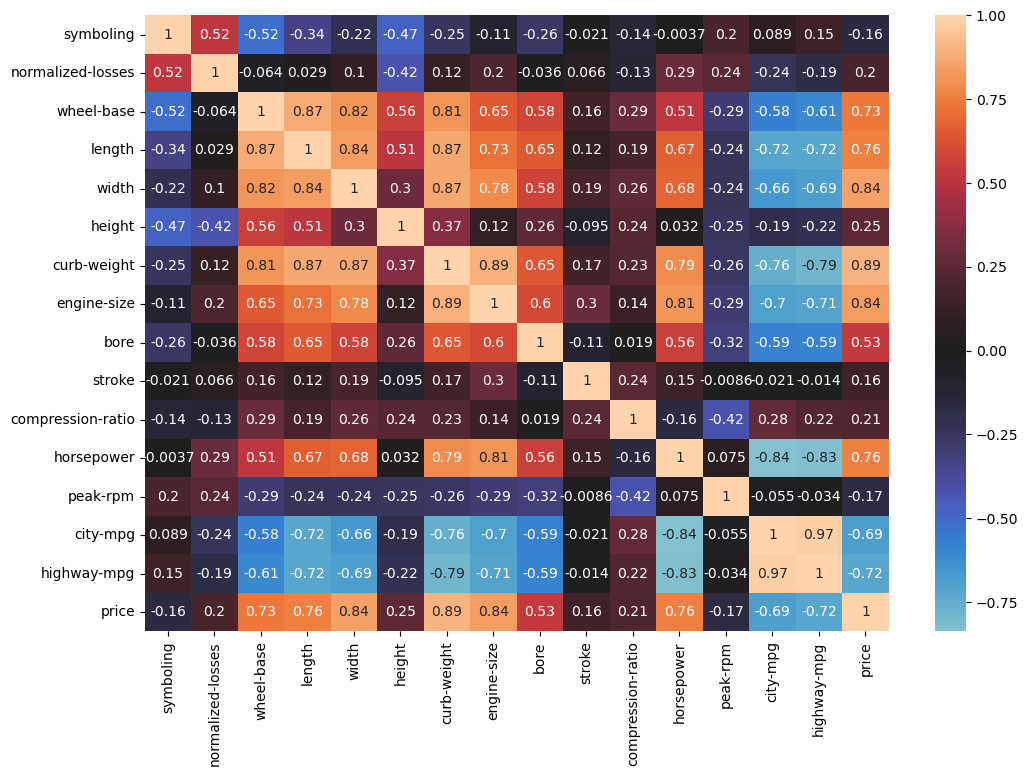

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, center=0);

In [20]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


- We observe various variables higly correlated with each other. (i.e. wheelbase, length, width) --> this leads to redundancy of information. 
- We observe some variable very poorly correlated to the target variable price. --> not very useful for prediction

- We will simplify the model by choosing only variables having aconcrete correlation with the target variable. 
- Among groups of higgly correlated variables we will retain only the one with the highest correlation to the target. 

- Finally, we mustvalidate the <u>hypothesis of linearity</u>, this we will do so by using a scatterplot for the variables with positive correlations to the target. 

- <u>Variables with positive corrs to target --> plot and review linearity to price: </u>
    - curb-weight, engine size --> keep <u>curb-weight</u>
    - length, width, wheelbase --> keep <u>width</u>!
    - <u>horsepower</u>
    - <u>bore</u>
    - <u>height</u>
    - <u>engine-size</u>

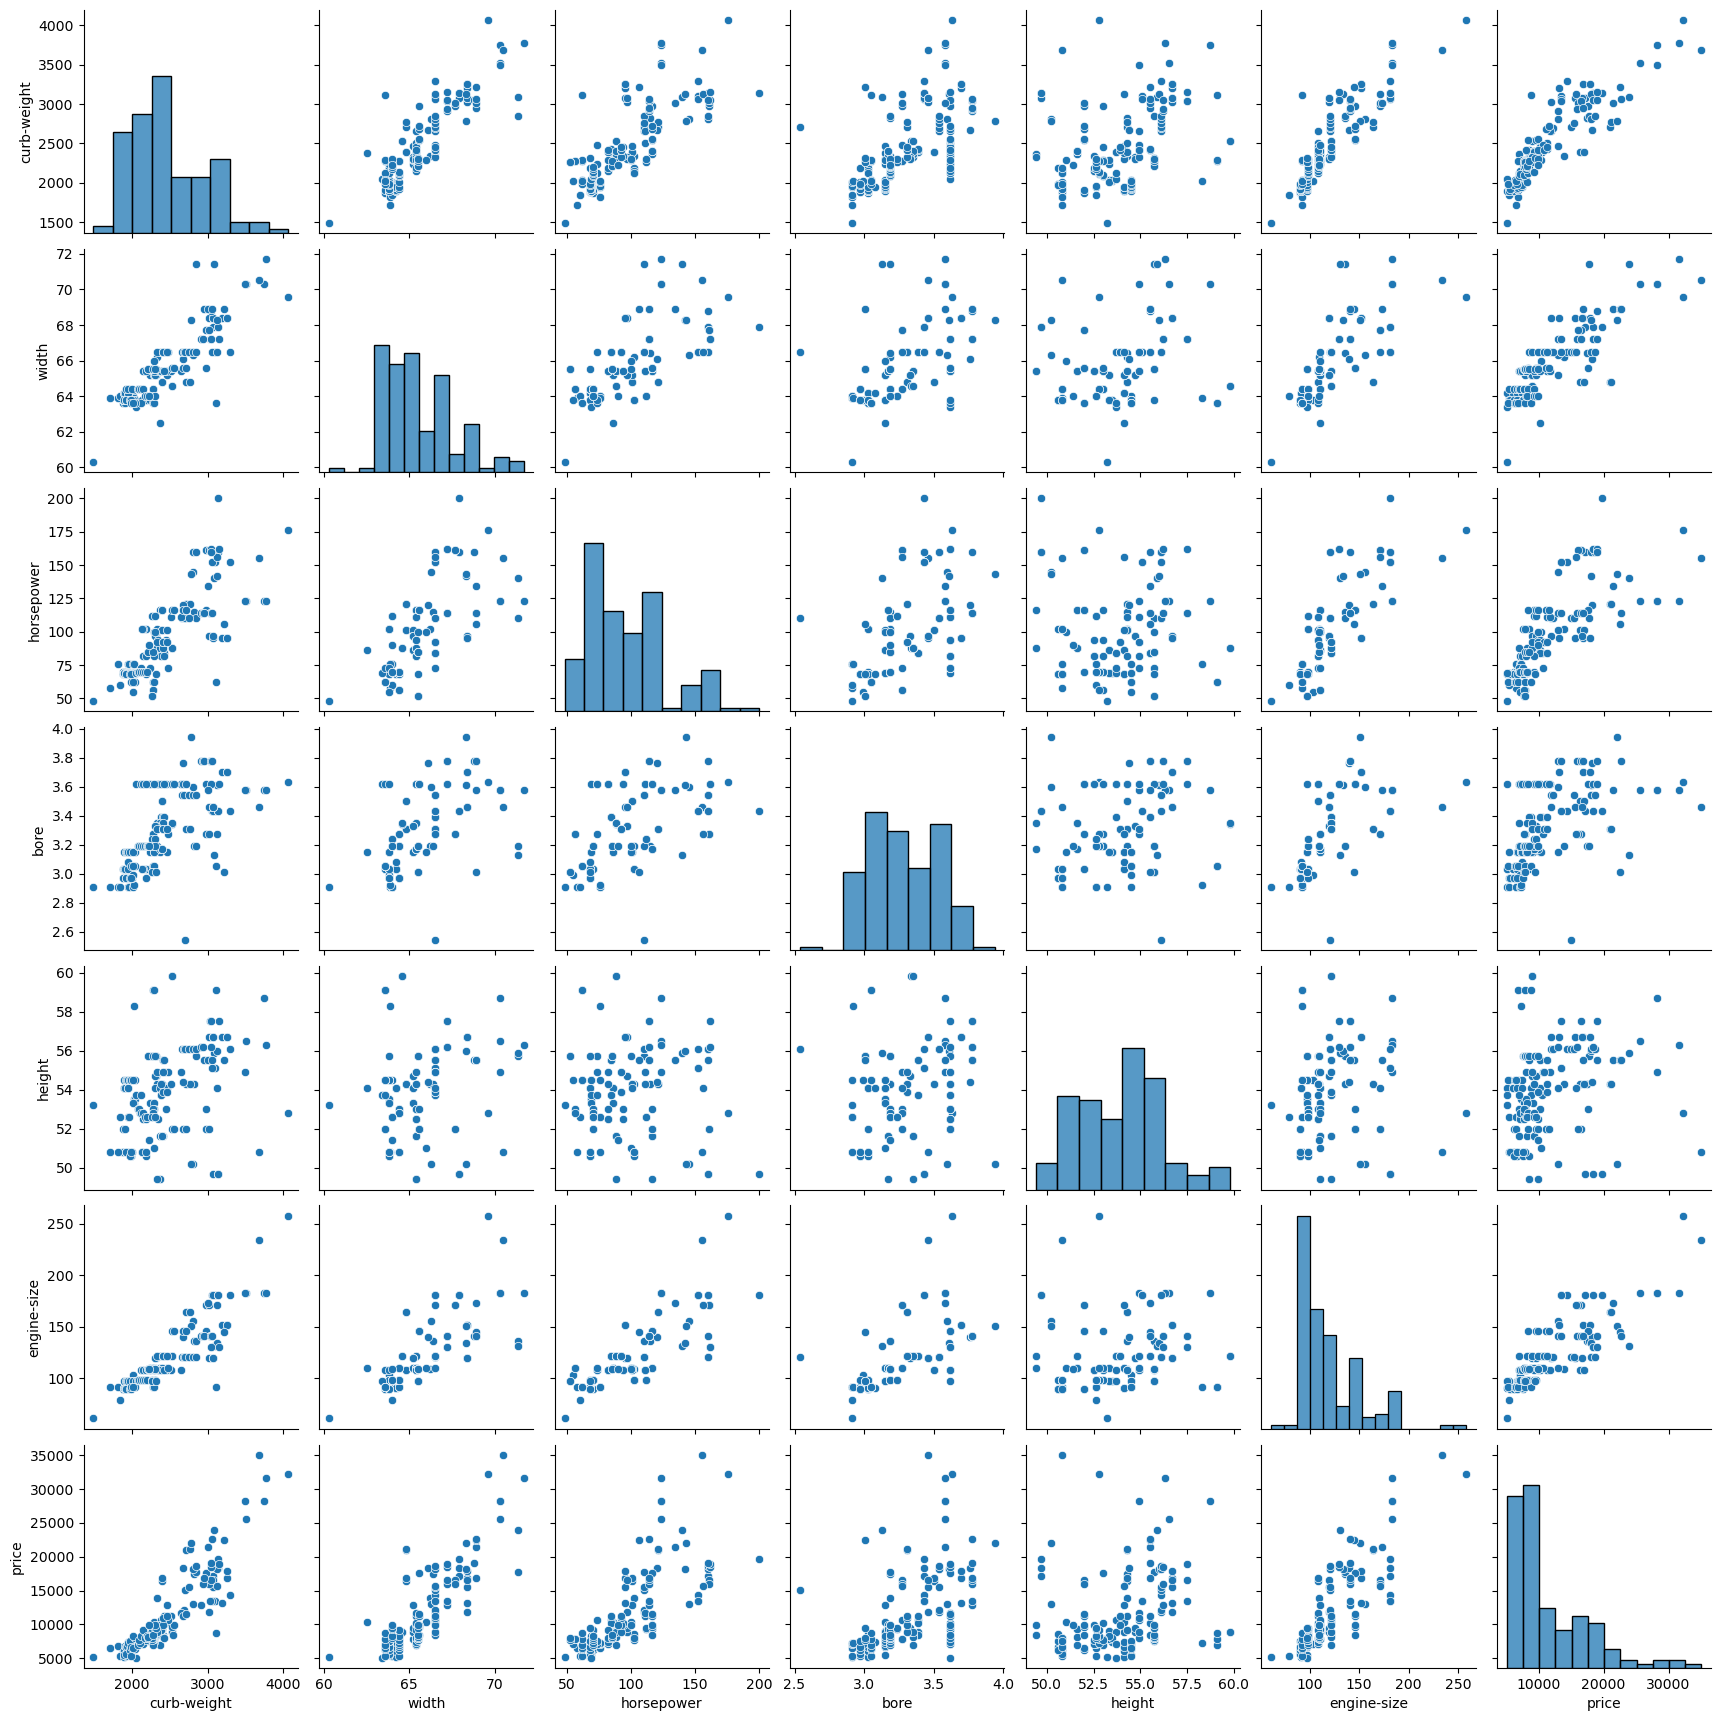

In [21]:
sns.pairplot(df[['curb-weight', 'width', 'horsepower', 'bore', 'height', 'engine-size', 'price']]);

From the scatterplot we can observe than only curb-weight, width, horsepower and bore resemble a linear relationship with price. 

These observations confirm the correlations calculated above, height and compression-ratio share much lower correlations with the target (<0.25)

In [22]:
signif_features= ['curb-weight', 'width', 'horsepower', 'bore']

# Train refined model 
- we will train the model using only the signif_features

In [23]:
lr2= LinearRegression()
# fit the model
lr2.fit(X_train[signif_features], y_train)   
# predict the target variable on train set
y_pred_train2= lr2.predict(X_train[signif_features])
# predict the target variable on test set
y_pred_test2= lr2.predict(X_test[signif_features])  

# R^2
print('Train R^2: ', round(lr2.score(X_train[signif_features], y_train),3))
print('Test R^2: ', round(lr2.score(X_test[signif_features], y_test),3))
#subplots


Train R^2:  0.847
Test R^2:  0.673


Decline R^2 in comparison to previous modeling with all num features, slight increase in overfitting.




We will now experiment with the tool SelectKBest. 
- it allows us to select the k most significant variables in relation to a score function, for eample the f_regression function
- f-regression functin calculates for each attribute the statistic associated with the significance test of this attribute in relation to the target variable, as well as the p-value

#### SelectKBest 

In [24]:
from sklearn.feature_selection import SelectKBest , f_regression

sk = SelectKBest(f_regression,k=6)

sk.fit(X=X,y=y)

X.columns[sk.get_support()]

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size',
       'horsepower'],
      dtype='object')

We observe the 6  selected variables are the most correlated ones. 

- We create train sets based on these features using the transform method from sk

In [25]:
sk_train= sk.transform(X_train)
sk_test= sk.transform(X_test)
# fit the model
lr4= LinearRegression()
# fit the model
lr4.fit(sk_train, y_train)
# predict the target variable on train set
y_pred_train4= lr4.predict(sk_train)
# predict the target variable on test set
y_pred_test4= lr4.predict(sk_test)
# R^2
print('Train R^2: ', round(lr4.score(sk_train, y_train),3))
print('Test R^2: ', round(lr4.score(sk_test, y_test),3))

Train R^2:  0.85
Test R^2:  0.686


We see slight improvements on these scores, meaning the model is somewhat more robust. Increased scores and reduced difference among train and test mean the overfitting has reduced. --> more robust

On further steps we could follow some more feature selection/engineering approaches  or try more advanced models. ie. penalized models. We proceed with the Ridge Regression

### Ridge Regression

- Apply regularization in order to avoid overfitting and to improve the model performance.
- Lasso regression and Ridge regression to the dataset as penalized models.

- Constraints (on the values beta can take as a whole) are imposed on the estimated coefficient of the regressions. (Shrinkage: ranges are narrowed wrt to the values the estimated parameters can take.)

#### Ridge regression: L2 norm penalty function  added
- alpha: hyperparameter that controls the strength of the penalty term.
--> choose the alpha that minimizes the error
- alpha = 1 default


In [29]:
# we give in a list of alphas
from sklearn.linear_model import RidgeCV
ridge_reg= RidgeCV(alphas=[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
# fit the model
ridge_reg.fit(X_train, y_train)
# predict the target variable on train set
y_pred_train_ridge= ridge_reg.predict(X_train)
# predict the target variable on test set
y_pred_test_ridge= ridge_reg.predict(X_test)
# R^2
print('Train R^2: ', round(ridge_reg.score(X_train, y_train),3))
print('Test R^2: ', round(ridge_reg.score(X_test, y_test),3))


Train R^2:  0.861
Test R^2:  0.725


In [ ]:
print('Scores improved in both sets, there was a slight decrease in overfitting!')
print('Retained Alpha: ',ridge_reg.alpha_)


Scores improved in both sets and reduction in overfitting!
Retained Alpha:  10.0


In [33]:
ridge_pred_train=ridge_reg.predict(X_train)
ridge_pred_test=ridge_reg.predict(X_test)

print('MSE Train: ', mean_squared_error(ridge_pred_train, y_train))
print('MSE Test: ', mean_squared_error(ridge_pred_test,y_test))

MSE Train:  5120506.802655375
MSE Test:  6441786.033550803


### Lasso Regression

- constraing is on L1-norm
- advantage: it can act as a variable selection device by canceling certain coefficients --> certain variables see their estimated coefficent zero --> de facto excluded from the predictie model. 
- the higher the penalty coefficient, the more the number of coefficients estimated at 0 increases
- among a group of correlated variables Lasso model chooses only one

In [ ]:
# import lassot
from sklearn.linear_model import LassoCV
# instantiate the model 
lasso_reg= LassoCV(alphas=[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
# fit the model
lasso_reg.fit(X_train, y_train)
# predict the target variable on train set
lasso_pred_train= lasso_reg.predict(X_train)
# predict the target variable on test set
lasso_pred_test= lasso_reg.predict(X_test)
# R^2
print('Train R^2: ', round(lasso_reg.score(X_train, y_train),3))
print('Test R^2: ', round(lasso_reg.score(X_test, y_test),3))


Train R^2:  0.858
Test R^2:  0.7
